In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels 
#import statsmodels.api as sm
from statsmodels.stats import multitest
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from cycler import cycler



In [24]:
def read_data(datapath, codebookpath):
    #fpath = './Rat_' + which + '_27_Oct_2022.csv'
    data = pd.read_csv(datapath, index_col='idno')
    codebook = pd.read_csv(codebookpath, index_col='metabolite')
    data = data.rename(columns=dict(zip(codebook.index, codebook.MetaboliteName)))
    return(data)
    
def filter_data(data):
    metabolites = data.columns[4:]
    metabolites2exclude = [m for m in metabolites if data.loc[:, m].isna().sum() > len(data) * 0.2]
    data = data.drop(metabolites2exclude, axis=1)
    #pd.concat([blood,bloodold], axis=0)
    A = set(blood.columns)
    B = set(bloodold.columns)
    len(B.difference(A))
    #print(B)
    drop_blood = blood.drop(A.difference(B), axis=1)
    drop_bloodold = bloodold.drop(B.difference(A), axis=1)
    #pd.concat([blood.drop(A.difference(B), axis=1), bloodold.drop(B.difference(A), axis=1)])
    np.array(list(zip(drop_blood.columns, drop_bloodold.columns)))
    return(data)

datapath_blood = '../Desktop/Rat_blood_27_Oct_2022.csv'
datapath_brain = '../Desktop/Rat_brain_27_Oct_2022.csv'

datapath_bloodold = '../Desktop/Rat_old_blood_17_Nov_2022.csv'
datapath_brainold = '../Desktop/Rat_old_brain_17_Nov_2022.csv'
codebookpath = '../Desktop/Rat_codebook_27_Oct_2022.csv'
    
#blood = read_data(which='blood')
#brain = read_data(which='brain')


blood = read_data(datapath_blood, codebookpath)
bloodold = read_data(datapath_bloodold, codebookpath)
blood = filter_data(blood)
bloodold = filter_data(bloodold)
brain = read_data(datapath_brain, codebookpath)
brainold = read_data(datapath_brainold, codebookpath)
brain = filter_data(brain)
brainold = filter_data(brainold)
brain


,LIScore,Group,material,species,Taurocholic acid,Carnitine,Acetylcarnitine,Propionylcarnitine,Butyrylcarnitine,Valerylcarnitine,...,Phosphatidylethanolamine ae 40:1,Phosphatidylethanolamine ae 42:2,Phosphatidylglycerol aa 32:0,Phosphatidylglycerol aa 34:1,Phosphatidylglycerol aa 36:2,Phosphatidylglycerol aa 36:4,Phosphatidylglycerol aa 38:5,Phosphatidylserine aa 34:1,Phosphatidylserine aa 36:1,Phosphatidylserine aa 40:6
idno,,,,,,,,,,,,,,,,,,,,,
105,249,AI,brain tissue,rat,NaN,11.034,1.521,NaN,NaN,0.033825,...,1.097,1.350,0.3983,4.147,0.6962,2.943,0.6260,3.963,23.820,95.495
1158,201,AU,brain tissue,rat,0.32700,10.904,4.107,0.142000,0.158000,0.068129,...,1.234,1.143,0.3517,3.036,0.5238,2.593,0.5484,4.052,NaN,76.815
1172,155,AU,brain tissue,rat,0.37800,10.132,4.187,0.072465,0.128000,0.066152,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1174,194,AU,brain tissue,rat,0.14600,10.024,4.249,0.146000,0.206000,0.132000,...,1.189,1.153,0.3748,3.530,0.5092,2.393,0.5173,3.979,34.066,65.968
127,291,AI,brain tissue,rat,NaN,11.611,3.001,NaN,0.088304,0.062654,...,1.145,1.413,0.4821,4.428,0.6463,2.665,0.5714,4.618,39.461,93.804
1368,285,AI,brain tissue,rat,0.03720,8.753,3.696,0.105000,0.145000,0.051299,...,1.234,1.368,0.3546,3.127,0.5751,2.273,0.5582,4.621,25.287,77.199
1416,274,AI,brain tissue,rat,0.62000,9.513,3.632,0.103000,0.145000,0.071780,...,1.313,1.448,0.4991,4.396,0.5918,2.794,0.6199,4.747,29.181,86.504
1424,216,AU,brain tissue,rat,0.60400,32.689,10.832,2.675000,0.447000,0.488000,...,1.184,1.161,0.3523,4.077,0.5641,2.460,0.5011,4.536,NaN,81.504
143,280,AI,brain tissue,rat,NaN,18.695,3.930,0.031219,0.105000,0.070783,...,1.547,1.343,0.4119,3.952,0.6400,2.335,0.5619,4.110,37.249,72.777


In [95]:
blood.columns

Index(['LIScore', 'Group', 'material', 'species', 'Cholic acid',
       'Chenodeoxycholic acid', 'Deoxycholic acid', 'Glycocholic acid',
       'Glycochenodeoxycholic acid', 'Glycodeoxycholic acid',
       ...
       'Phosphatidylserine aa 40:6', 'Phosphatidylserine aa 40:7',
       'Phosphatidylserine aa 42:1', 'Phosphatidylserine aa 42:2',
       'Phosphatidylserine aa 42:4', 'Phosphatidylserine aa 42:5',
       'Phosphatidylserine ae 34:2', 'Phosphatidylserine ae 36:1',
       'Phosphatidylserine ae 36:2', 'Phosphatidylserine ae 38:4'],
      dtype='object', length=503)

In [96]:
bloodold.columns

Index(['LIscore', 'Group', 'Carnitine', 'Acetylcarnitine',
       'Propionylcarnitine', 'Malonylcarnitine (Hydroxybutyrylcarnitine)',
       'Hydroxypropionylcarnitine', 'Propenoylcarnitine', 'Butyrylcarnitine',
       'Butenylcarnitine',
       ...
       'alpha-Muricholic acid', 'beta-Muricholic acid',
       'omega-Muricholic acid', 'Taurocholic acid',
       'Taurochenodeoxycholic acid', 'Taurodeoxycholic acid',
       'Taurolithocholic acid', 'Tauromuricholic acid (alpha + beta)',
       'Tauroursodeoxycholic acid', 'Ursodeoxycholic acid'],
      dtype='object', length=500)

In [94]:
#pd.concat([blood,bloodold], axis=0)
A = set(blood.columns)
B = set(bloodold.columns)
len(B.difference(A))
#print(B)
drop_blood = blood.drop(A.difference(B), axis=1)
drop_bloodold = bloodold.drop(B.difference(A), axis=1)
#pd.concat([blood.drop(A.difference(B), axis=1), bloodold.drop(B.difference(A), axis=1)])
np.array(list(zip(drop_blood.columns, drop_bloodold.columns)))

array([['Group', 'Group'],
       ['Cholic acid', 'Carnitine'],
       ['Chenodeoxycholic acid', 'Acetylcarnitine'],
       ['Deoxycholic acid', 'Propionylcarnitine'],
       ['Glycocholic acid', 'Malonylcarnitine (Hydroxybutyrylcarnitine)'],
       ['Glycochenodeoxycholic acid', 'Hydroxypropionylcarnitine'],
       ['Glycodeoxycholic acid', 'Propenoylcarnitine'],
       ['Glycolithocholic acid', 'Butyrylcarnitine'],
       ['Glycoursodeoxycholic acid', 'Butenylcarnitine'],
       ['Hyodeoxycholic acid', 'Valerylcarnitine'],
       ['Lithocholic acid',
        'Glutarylcarnitine (Hydroxyhexanoylcarnitine)'],
       ['alpha-Muricholic acid', 'Methylglutarylcarnitine'],
       ['beta-Muricholic acid',
        'Hydroxyvalerylcarnitine (Methylmalonylcarnitine)'],
       ['omega-Muricholic acid', 'Tiglylcarnitine'],
       ['Taurocholic acid', 'Glutaconylcarnitine'],
       ['Taurochenodeoxycholic acid',
        'Hexanoylcarnitine (Fumarylcarnitine)'],
       ['Taurodeoxycholic acid', 'Hexe

In [65]:
#pd.DataFrame.join?

In [10]:
def extract2groups(metabolite, groupA='AU', groupB='AI', df=blood):
    l = [df.loc[df.Group == g, metabolite].dropna() for g in [groupA, groupB]]
    return(l)

def get_log_p(A, B):
    val = - np.log10(stats.ttest_ind(A, B)[1])
    return(val)

def get_effect_size(A, B):
    '''
    The effect size x is B relative to A, so if A > B => x < 0
    '''
    #val = B.mean() - A.mean()
    OR = B.mean() / A.mean()
    log2OR = np.log2(OR)
    return(log2OR)

def get_both(metabolite, groupA='AU', groupB='AI', df=blood):
    A, B = extract2groups(metabolite, groupA, groupB, df)
    log_p = get_log_p(A, B)
    fx_size = get_effect_size(A, B)
    return((fx_size, log_p))

def get_both_all(groupA='AU', groupB='AI', df=blood):
     metabolites = df.columns[4:]
     l = [get_both(m, groupA, groupB, df) for m in metabolites]
     fx_sizes = [x[0] for x in l]
     log_ps = [x[1] for x in l]
     return((fx_sizes, log_ps))

In [11]:
comparisons = {
    'AI vs. AU': ['AU', 'AI'],
    'AI vs. Y': ['Y', 'AI'],
    'AU vs. Y': ['Y', 'AU'],
              }
results_blood = {k: get_both_all(*v, df=blood) for k, v in comparisons.items()}
results_bloodold = {k: get_both_all(*v, df=bloodold) for k, v in comparisons.items()}
results_brain = {k: get_both_all(*v, df=brain) for k, v in comparisons.items()}
results_brainold = {k: get_both_all(*v, df=brainold) for k, v in comparisons.items()}


In [5]:
#results_blood['AI vs. AU']

In [12]:
def writeResults(dataset='brain', comparison = 'AI vs. AU', method='fdr_bh'):
    data = blood if dataset=='blood' else brain
    codebook = pd.read_csv(codebookpath, index_col='MetaboliteName')
    metabolites = data.columns[4:]
    metab_class = codebook.loc[metabolites, 'AnalyteClass']
    results = results_blood if dataset=='blood' else results_brain
    t = results[comparison]
    direction = ['Increase' if x>0 else 'Decrease' for x in t[0]]
    pvals = 10 ** (-np.array(t[1]))
    reject05, pvals_corrected05, alphacSidak05, alphacBonf05 = statsmodels.stats.multitest.multipletests(pvals, alpha=0.05, method=method)
    reject1, pvals_corrected1, alphacSidak1, alphacBonf1 = statsmodels.stats.multitest.multipletests(pvals, alpha=0.1, method=method)
    reject2, pvals_corrected2, alphacSidak2, alphacBonf2 = statsmodels.stats.multitest.multipletests(pvals, alpha=0.2, method=method)
    reject5, pvals_corrected5, alphacSidak5, alphacBonf5 = statsmodels.stats.multitest.multipletests(pvals, alpha=0.5, method=method)
    df = pd.DataFrame({'Dataset':dataset, 'Comparison': comparison,
                       'Analyte class': metab_class, 'Metabolite': metabolites,
                       'Effect size':t[0],'"- log p"':t[1], 'p': pvals,
                       r'Corrected p for a=.05': pvals_corrected05,
                       r'Reject H0 for a=.05': reject05,
                       #r'Corrected p for a=.1': pvals_corrected1,
                       r'Reject H0 for a=.1': reject1,
                       #r'Corrected p for a=.2': pvals_corrected2,
                       r'Reject H0 for a=.2': reject2,
                       r'Bonferroni alpha for a=.05': alphacBonf05,
                       r'Bonferroni alpha for a=.1': alphacBonf1,
                       r'Bonferroni alpha for a=.2': alphacBonf2,
                       r'Bonferroni alpha for a=.5': alphacBonf5,
                      })
    df = df.sort_values('Effect size')
    df = df.sort_values('p')
    df['Rank'] = np.arange(len(df)) + 1
    return(df)

In [25]:
l_blood = [writeResults(dataset='blood', comparison = c) for c in comparisons.keys()]
l_bloodold = [writeResults(dataset='bloodold', comparison = c) for c in comparisons.keys()]
l_brain = [writeResults(dataset='brain', comparison = c) for c in comparisons.keys()]
l_brainold = [writeResults(dataset='brainold', comparison = c) for c in comparisons.keys()]
#l_bloodold = [writeResults(dataset='bloodold', comparison = c) for c in comparisons.keys()]
summary = pd.concat(l_blood + l_brain + l_bloodold + l_brainold)
summary.to_csv('summary.csv')
summary


,Dataset,Comparison,Analyte class,Metabolite,Effect size,"""- log p""",p,Corrected p for a=.05,Reject H0 for a=.05,Reject H0 for a=.1,Reject H0 for a=.2,Bonferroni alpha for a=.05,Bonferroni alpha for a=.1,Bonferroni alpha for a=.2,Bonferroni alpha for a=.5,Rank
Phosphatidylcholine aa C40:5,blood,AI vs. AU,Phosphatidylcholines,Phosphatidylcholine aa C40:5,-0.656900,1.831301,0.014747,0.758869,False,False,False,0.000189,0.000379,0.000758,0.001894,1
Linolenic acid,blood,AI vs. AU,Free_Fatty_Acids,Linolenic acid,-0.442021,1.707973,0.019590,0.758869,False,False,False,0.000189,0.000379,0.000758,0.001894,2
"5-beta,6-beta-Epoxycholesterol",blood,AI vs. AU,Free_Oxysterols,"5-beta,6-beta-Epoxycholesterol",-1.162864,1.677275,0.021024,0.758869,False,False,False,0.000189,0.000379,0.000758,0.001894,3
Spermine,blood,AI vs. AU,Amino_Acids_and_Biogenic_Amines,Spermine,0.550324,1.646695,0.022558,0.758869,False,False,False,0.000189,0.000379,0.000758,0.001894,4
trans-4-Hydroxyproline,blood,AI vs. AU,Amino_Acids_and_Biogenic_Amines,trans-4-Hydroxyproline,0.969954,1.588279,0.025806,0.758869,False,False,False,0.000189,0.000379,0.000758,0.001894,5
"5-alpha,6-alpha-Epoxycholesterol",blood,AI vs. AU,Free_Oxysterols,"5-alpha,6-alpha-Epoxycholesterol",-1.300067,1.496875,0.031851,0.758869,False,False,False,0.000189,0.000379,0.000758,0.001894,6
alpha-Aminoadipic acid,blood,AI vs. AU,Amino_Acids_and_Biogenic_Amines,alpha-Aminoadipic acid,0.461159,1.455831,0.035008,0.758869,False,False,False,0.000189,0.000379,0.000758,0.001894,7
Phosphatidylcholine aa C40:4,blood,AI vs. AU,Phosphatidylcholines,Phosphatidylcholine aa C40:4,-0.451711,1.443368,0.036027,0.758869,False,False,False,0.000189,0.000379,0.000758,0.001894,8
Glycine,blood,AI vs. AU,Amino_Acids_and_Biogenic_Amines,Glycine,0.392926,1.374221,0.042245,0.758869,False,False,False,0.000189,0.000379,0.000758,0.001894,9
2-Hydroxyacyldihydroceramide C16:0,blood,AI vs. AU,Ceramides,2-Hydroxyacyldihydroceramide C16:0,-0.403521,1.335998,0.046132,0.758869,False,False,False,0.000189,0.000379,0.000758,0.001894,10


In [52]:
"""pvals = results_blood['AI vs. AU'][1]

val = statsmodels.stats.multitest.multipletests(pvals, alpha=0.05, method='bonferroni', is_sorted=False, returnsorted=True)
print(val)
"""

"pvals = results_blood['AI vs. AU'][1]\n\nval = statsmodels.stats.multitest.multipletests(pvals, alpha=0.05, method='bonferroni', is_sorted=False, returnsorted=True)\nprint(val)\n"

In [28]:
"""""def my_volcano(results):
    fig, ax = plt.subplots(1, len(comparisons), figsize=(12, 4), sharey=False, sharex=True)
    for axi, comparison in zip(ax, comparisons):
        axi.scatter(x=results[comparison][0], y=results[comparison][1], marker='.')
        axi.set_title(comparison)
        axi.set_xlabel(r'$\log_{2}$ fold change')
        axi.set_ylabel(r'$- \log_{10} p$')
    return((fig, ax))

fig, ax = my_volcano(results_blood)
fig, ax = my_volcano(results_brain)"""

'""def my_volcano(results):\n    fig, ax = plt.subplots(1, len(comparisons), figsize=(12, 4), sharey=False, sharex=True)\n    for axi, comparison in zip(ax, comparisons):\n        axi.scatter(x=results[comparison][0], y=results[comparison][1], marker=\'.\')\n        axi.set_title(comparison)\n        axi.set_xlabel(r\'$\\log_{2}$ fold change\')\n        axi.set_ylabel(r\'$- \\log_{10} p$\')\n    return((fig, ax))\n\nfig, ax = my_volcano(results_blood)\nfig, ax = my_volcano(results_brain)'

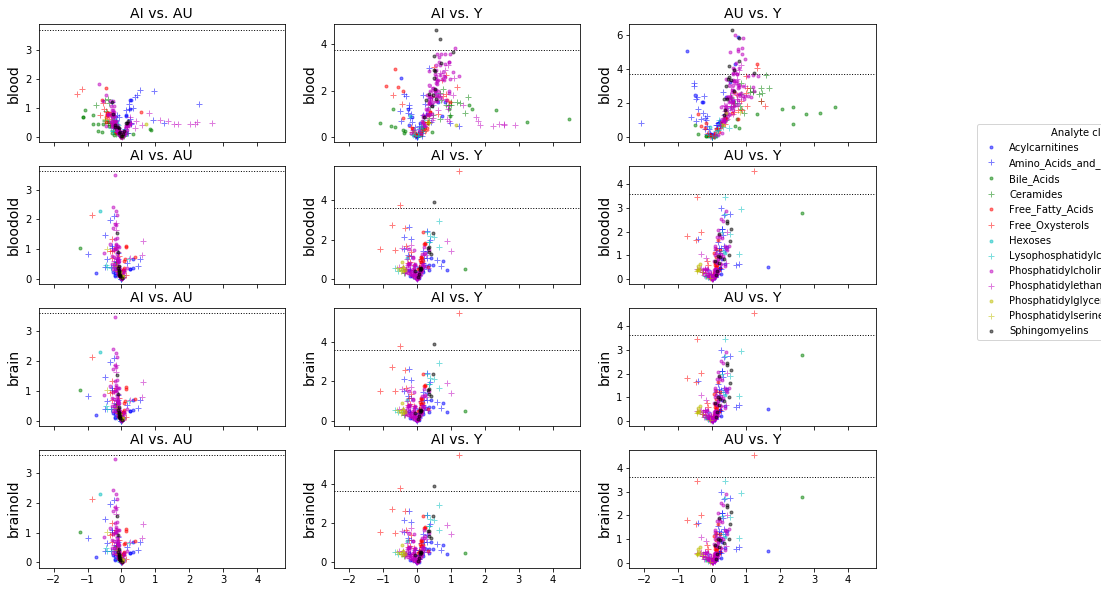

In [26]:
def volcano_subplot(axi, df, comparison, dataset, classes, dolabel=False):
    my_cycler = (cycler(color=list('bgrcmyk')) * cycler(marker=['.', '+']))
    axi.set_prop_cycle(my_cycler)
    for k, cls in enumerate(classes):
        clsdf = df.loc[df['Analyte class'] == cls]
        bonf_alpha = -np.log10(clsdf['Bonferroni alpha for a=.05'].to_list()[0])
        if k == 0:
            axi.axhline(y=bonf_alpha, linestyle='dotted', color='black', linewidth=1)
        label = cls if dolabel else None
        axi.plot(clsdf['Effect size'], clsdf['"- log p"'], label=label, alpha=0.5, linestyle = '')
        #axi.scatter(x=clsdf['Effect size'], y=clsdf['"- log p"'], label=cls, alpha=0.5) # this does not work with cycler & marker 
        axi.set_title(comparison, fontsize=14)
        axi.set_ylabel(dataset, fontsize=14)
    return(axi)

def my_volcano(summary, swapij=False, figsize=(15, 10)):
    comparisons = np.unique(summary.Comparison)
    datasets = np.unique(summary.Dataset)
    classes = np.unique(summary['Analyte class'])
    fig, ax = plt.subplots(len(datasets), len(comparisons), figsize=figsize, sharey=False, sharex=True)
    for i, dataset in enumerate(datasets):
        for j, comparison in enumerate(comparisons):
            df = summary.loc[(summary.Dataset == dataset) & (summary.Comparison == comparison)]
            axi = ax[j, i] if swapij else ax[i, j]
            dolabel = (i == 0) and (j == 0)
            volcano_subplot(axi, df, comparison, dataset, classes, dolabel=dolabel)
  #  fig.supxlabel(r'$\log_{2}$ fold change', fontsize=16)
   # fig.supylabel(r'$- \log_{10} p$', fontsize=16)
    fig.legend(loc='center left', bbox_to_anchor=(0.9, 0.5), title='Analyte class')
    return((fig, ax))

fig, ax = my_volcano(summary)

In [ ]:
imp_blood = [writeResults(dataset='blood', comparison = c) for c in comparisons.keys()]
imp_brain = [writeResults(dataset='brain', comparison = c) for c in comparisons.keys()]

results_blood['AI vs. AU'][1]

impairment = pd.concat(l_blood + l_brain)
impairment.to_csv('impairment.csv')
impairment